In [1]:
import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY313,
)

DEBUG:jupyter_black:Using config from C:\Users\haavarug\Documents\VSCode-PhD\chemometrics\pyproject.toml
DEBUG:jupyter_black:config: {'line_length': 79, 'lab': False, 'target_versions': {<TargetVersion.PY313: 13>}}


TypeError: Mode.__init__() got an unexpected keyword argument 'lab'

# Solution to exercise set 4: Principal component analysis and clustering

The main goals of this exercise are to perform principal component analysis (PCA) and k-means clustering.


**Learning Objectives:**

After completing this exercise set, you will be able to:

* Run PCA to reduce the dimensionality of a data set.
* Visualise PCA results by creating score plots (showing data point projections), loading plots (illustrating variable influence), and variance-explained plots (indicating component significance).
* Interpret results from PCA by inspecting the scores and loadings plots to explain groupings and variable contributions.
* Run k-means clustering for a data set and use the [elbow method](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#Elbow_method) to select the best number of clusters.



**To get the exercise approved, complete the following problems:**

- [4.1(a)](#4.1(a)) and [4.1(b)](#4.1(b)): to show that you can perform PCA and plot the scores and the variance explained per principal component.
- [4.2(a)](#4.2(a)) and [4.2(b)](#4.2(b)): to show that you can also plot the loadings from PCA, and interpret the scores and loadings.
- [4.3(a)](#4.3(a)): to show that you can apply k-means clustering to a data set and select the best number of clusters

## Exercise 4.1 Molecular conformations

We have performed molecular dynamics simulations to model the various conformations a molecule can adopt. We have collected 4004 snapshots, each representing a conformation and we have recorded the 3D coordinates of each atom in each conformation.

The file `molecule.csv` contains these coordinates, organized as follows:

* Each row represents a single molecular conformation.
* The columns contain the x, y, and z coordinates of each atom.
* The column labels follow a pattern:
   * `1x`, `1y`, `1z` represent the coordinates of atom 1,
   * `2x`, `2y`, `2z` those of atom 2, and so on, up to atom 22.

Here is a snippet of the data (first three conformations/rows):

|     |    1x |    1y |    1z |    2x | ... |   22x |   22y |   22z |
|----:|------:|------:|------:|------:|:---:|------:|------:|------:|
|   0 | 14.585 | 13.725 | 12.373 | 13.759 | ... | 14.882 | 14.462 | 10.500 |
|   1 | 14.585 | 13.868 | 12.458 | 13.773 | ... | 15.061 | 14.033 | 10.411 |
|   2 | 14.668 | 13.689 | 12.557 | 13.667 | ... | 14.914 | 14.276 | 10.359 |


Our goal is to use Principal Component Analysis (PCA) to determine if we can identify distinct groups or clusters of these molecular conformations based on their atomic coordinate data.

In [1]:
# The raw data can be loaded as follows:
import pandas as pd

data1 = pd.read_csv("molecule.csv")
data1.head()

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,19z,20x,20y,20z,21x,21y,21z,22x,22y,22z
0,14.585,13.725,12.373,13.759,12.631,13.162,15.657,13.504,12.619,14.341,...,11.055,12.535,14.790,10.204,14.629,12.756,10.541,14.882,14.462,10.500
1,14.585,13.868,12.458,13.773,12.721,13.075,15.642,13.816,12.678,14.094,...,11.039,12.686,14.848,10.264,14.340,12.467,10.898,15.061,14.033,10.411
2,14.668,13.689,12.557,13.667,12.552,12.999,15.702,13.482,12.568,14.269,...,11.010,12.668,14.891,10.285,14.508,12.630,10.714,14.914,14.276,10.359
3,14.717,13.715,12.537,13.626,12.541,13.014,15.726,13.543,12.762,14.485,...,11.009,12.531,14.839,10.421,14.344,12.617,10.793,14.968,14.284,10.422
4,14.587,13.724,12.362,13.744,12.627,13.169,15.654,13.490,12.586,14.438,...,10.993,12.558,14.805,10.259,14.597,12.708,10.470,14.847,14.517,10.420


### 4.1(a)

**Task: Run PCA on this data set and plot the variance explained as a function of the principal components, for instance in a bar plot or a line plot. How much of the variance is explained by principal components 1 and 2?**

**Hints:** Assuming that `X` contains our data, a PCA can be carried out as follows:

```python
from sklearn.decomposition import PCA
pca = PCA()
scores = pca.fit_transform(X)
```

This will store the scores in the variable `scores` which can be directly used in a scatter plot.
It is also useful to inspect
how much of the variance each principal component is explaining.
The fraction of the variance explained by each component can be accessed via:
```python
variance = pca.explained_variance_ratio_
```

**Note:** The raw data has already been scaled so you can use it directly without preprocessing.

In [2]:
X = data1.to_numpy()

from sklearn.decomposition import PCA

pca = PCA()
scores = pca.fit_transform(X)

Explained variance:
PC1: 72.6%, PC2: 17.4%


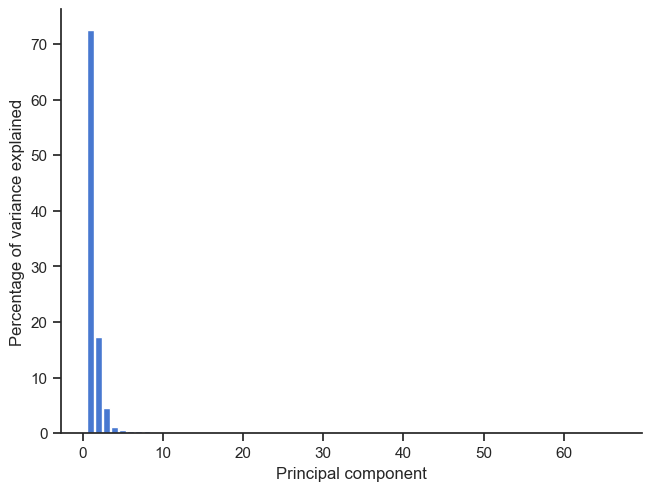

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks", context="notebook", palette="muted")

fig, ax = plt.subplots(constrained_layout=True)
percent = pca.explained_variance_ratio_ * 100
ax.bar(np.arange(1, len(percent) + 1), percent)
ax.set_xlabel("Principal component")
ax.set_ylabel("Percentage of variance explained")
print("Explained variance:")
print(f"PC1: {percent[0]:.3g}%, PC2: {percent[1]:.3g}%")
sns.despine(fig=fig)

#### Your answer to question 4.1(a): How much of the variance is explained by principal components 1 and 2?

PC1 explains 72.6% of the variance and PC2 17.4%.

### 4.1(b)

**Task: Create a scatter plot where you show the scores for PC1 and PC2 (the data projection onto the first two principal components). Can you see any groups in your data?** 

Text(0, 0.5, 'Scores, PC2 (17.4%)')

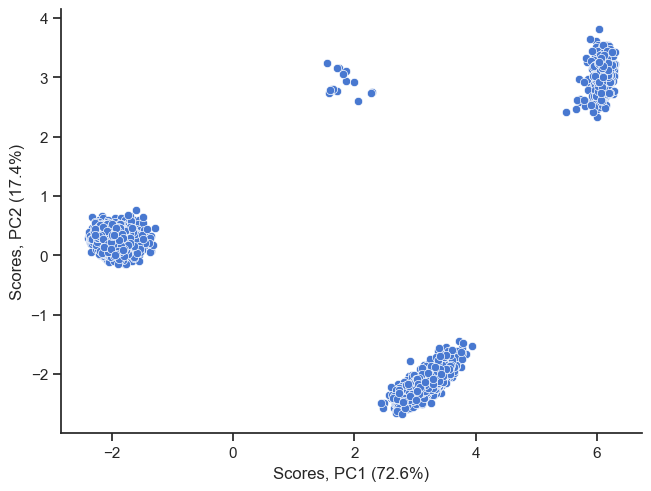

In [4]:
fig, ax = plt.subplots(constrained_layout=True)
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
sns.despine(fig=fig)
ax.set_xlabel(f"Scores, PC1 ({percent[0]:.3g}%)")
ax.set_ylabel(f"Scores, PC2 ({percent[1]:.3g}%)")

#### Your answer to question 4.1(b): Do you see any clusters in your plot of the scores?

Yes, it seems to be 4 clusters.

### 4.1(c)


**Task: Use [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) to investigate if there are any clusters in the data. Create a scatter plot of the t-SNE scores to visualize the data. Do you see any clusters?**

**Hint:** Assuming that `X` contains our data, dimensionality reduction by t-SNE can be carried out as follows:

```python
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_scores = tsne.fit_transform(X)
```

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=2025)
tsne_scores = tsne.fit_transform(X)

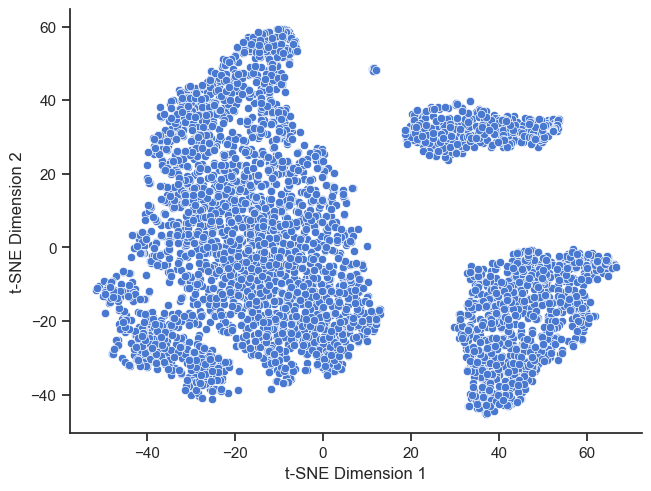

In [6]:
fig, ax = plt.subplots(constrained_layout=True)
sns.scatterplot(x=tsne_scores[:, 0], y=tsne_scores[:, 1])
ax.set(xlabel="t-SNE Dimension 1", ylabel="t-SNE Dimension 2")
sns.despine(fig=fig)

The results of t-SNE will depend on the hyperparameter `perplexity`. Let us investigate a few different values:

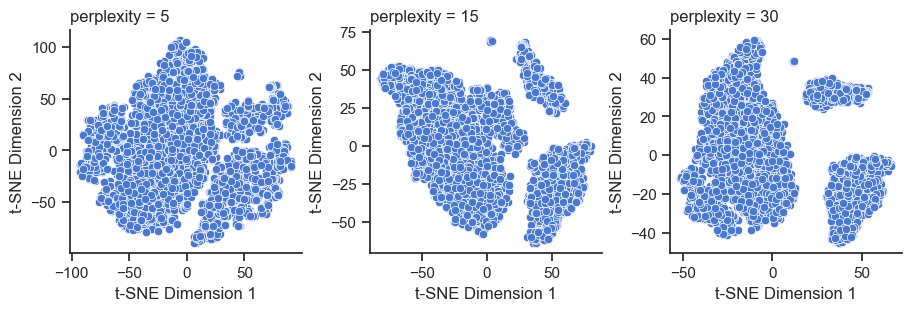

In [7]:
perplexity = [5, 15, 30]
fig, axes = plt.subplots(
    constrained_layout=True,
    ncols=len(perplexity),
    figsize=(len(perplexity) * 3, 3),
)

for i, p in enumerate(perplexity):
    tsne_i = TSNE(n_components=2, perplexity=p, random_state=2025)
    tsne_i_scores = tsne_i.fit_transform(X)
    sns.scatterplot(x=tsne_i_scores[:, 0], y=tsne_i_scores[:, 1], ax=axes[i])
    axes[i].set(xlabel="t-SNE Dimension 1", ylabel="t-SNE Dimension 2")
    axes[i].set_title(f"perplexity = {p}", loc="left")
sns.despine(fig=fig)

#### Your answer to question 4.1(c): Do you see any clusters when you plot the t-SNE scores?

Yes, t-SNE show distinct clusters in the data. The number and definition of these clusters are influenced by the perplexity parameter, but it seems to be three prominent clusters and a fourth smaller cluster.

## Exercise 4.2 Detection of milk adulteration

[Prabowo](https://doi.org/10.5281/zenodo.13766649) recently investigated the feasibility of using a regular smartphone for milk quality analysis, specifically for the detection of adulteration.

Prabowo used image analysis techniques to extract information from digital images of various milk samples, including pure milk, milk adulterated with rice water, and milk contaminated with lead(II)-ions. The images were captured using a smartphone (iPhone 13 Pro) under controlled conditions to ensure consistency in lighting, zoom, and distance. From the images, 4 numerical values were extracted:

* The intensity of the red, green, and blue colour components from an area in the middle of the sample.
* The amount of grey colour in the same area.

This data can be found in the file [milk.csv](./milk.csv) which contains the following columns:

* `Red`: the red colour component intensity
* `Green`: the green color component intensity
* `Blue`: the blue colour component intensity
* `Red/Blue`: the ratio of the red to blue colour component intensity
* `Red/Green`: the ratio of the red to green colour component intensity
* `Blue/Green`: the ratio of the blue to green colour component intensity
* `Grey`: the average grey pixel intensity
* `Type`: a text describing the sample (type of milk pictured):
    * `Milk (control)`: Samples of pure milk
    * `Rice water (control)`: Samples of pure rice water mixtures
    * `Milk + rice water`: Samples created by mixing pure milk with rice water. This simulates adultered milk.
    * `Milk + lead`: Samples created by mixing pure milk with lead of various concentrations. This simulates lead-contaminated milk.

We will investigate if we can use this data to distinguish between the different types by performing principal component analysis.

### 4.2(a)

**Tasks:**
1. **Load the data set and perform PCA to obtain the scores. Scale the data before performing PCA.**
2. **Create scatter plots of the scores (you can investigate different combinations of principal components), colour the samples according to their type and investigate visually if the different sample types appear as distinct clusters.**

**Hints:**

1. In this case, the analysis may benefit from standardisation of the variance (since we may have different units or natural scales for the numbers). Assuming that our data is stored in the matrix `X`, we can standardise it as follows:
```python
from sklearn.preprocessing import scale
X_scaled = scale(X)
```

2. Coloring a scatter plot according to a column in a Pandas data frame can be done with [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) from seaborn:
```python
import pandas as pd
import seaborn as sns

data2 = pd.read_csv("milk.csv")  # load data

# ... assuming scores contain the PCA scores:
sns.scatterplot(
    data=data2,  # select the data frame
    x=scores[:, 0],  # select data to put on the x-axis
    y=scores[:, 1],  # select data to put on the y-axis
    hue="Type",  # select data to use for colouring (column from data2)
)
```

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

data2 = pd.read_csv("milk.csv")
data2.head()

,Red,Green,Blue,Red/Blue,Red/Green,Blue/Green,Grey,Type
0,197.572,189.572,153.572,1.287,1.042,0.000810,141.940,Milk (control)
1,198.364,190.231,154.630,1.283,1.043,0.000813,137.579,Milk (control)
2,197.625,189.625,153.625,1.286,1.042,0.000810,148.488,Milk (control)
3,202.659,195.843,160.289,1.264,1.035,0.000818,141.783,Milk (control)
4,205.245,197.405,161.643,1.270,1.040,0.000819,139.688,Milk (control)


In [9]:
variables = [i for i in data2.columns if i not in ("Type",)]
X_milk = data2[variables].to_numpy()
X_scaled = scale(X_milk)

pca = PCA()
scores = pca.fit_transform(X_scaled)

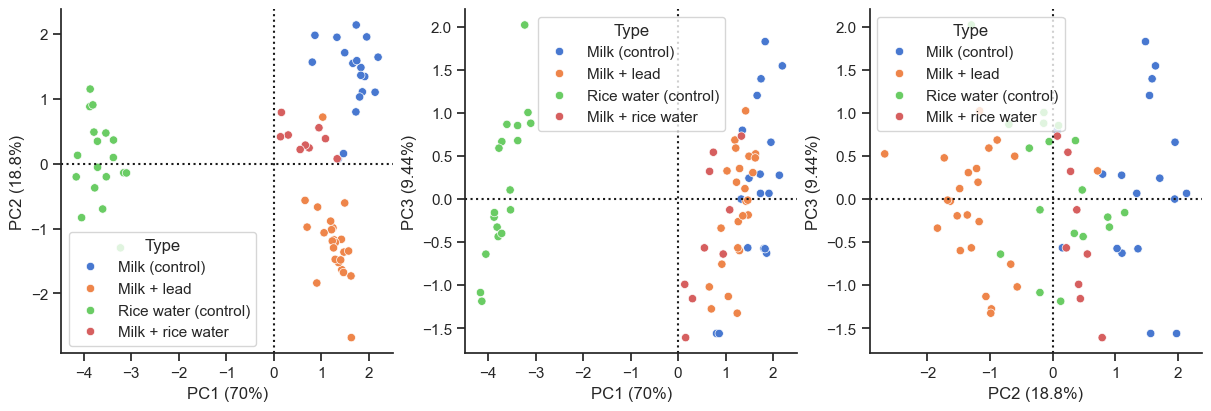

In [10]:
fig, axes = plt.subplots(constrained_layout=True, ncols=3, figsize=(12, 4))
for k, (i, j) in enumerate([(0, 1), (0, 2), (1, 2)]):
    sns.scatterplot(
        x=scores[:, i], y=scores[:, j], data=data2, hue="Type", ax=axes[k]
    )
    axes[k].set_xlabel(
        f"PC{i+1} ({pca.explained_variance_ratio_[i]*100:.3g}%)"
    )
    axes[k].set_ylabel(
        f"PC{j+1} ({pca.explained_variance_ratio_[j]*100:.3g}%)"
    )
    axes[k].axhline(y=0, color="k", ls=":")
    axes[k].axvline(x=0, color="k", ls=":")
sns.despine(fig=fig)

#### Your answer to question 4.2(a): Do the different sample types appear as distinct clusters?

The scores plot of principal components 1 and 2 show separation between the different sample types.
Rice water samples form a distinct cluster on the negative side of PC1, while the other samples are on the positive side. Along PC2, there is a separation between pure milk and milk samples contaminated with lead: the pure milk samples can be found at positive PC2, while the lead-contaminated samples are found at negative PC2. PC1, accounting for 70% of the variance, primarily separates rice water from milk-containing samples.
PC2, accounting for 19% of the variance, appears to separate pure milk from lead-contaminated milk.

There is also a grouping closer to the origin for the samples containing both milk and rice water. This location, close to the origin, typically represent samples that are intermediate or average relative to the other samples. This is consistent with the samples being mixtures of milk and rice water.

The PC1 vs. PC3 and PC2 vs. PC3 plots provide less clear separation between the sample types compared to the PC1 vs. PC2 plot. Therefore, the PC1 vs. PC2 plot is the most useful in this case.

In [11]:
# Let us try t-SNE in this case, just for comparison:
milk_tsne = TSNE(n_components=2, perplexity=10, random_state=2025)
milk_tsne_scores = milk_tsne.fit_transform(X_scaled)

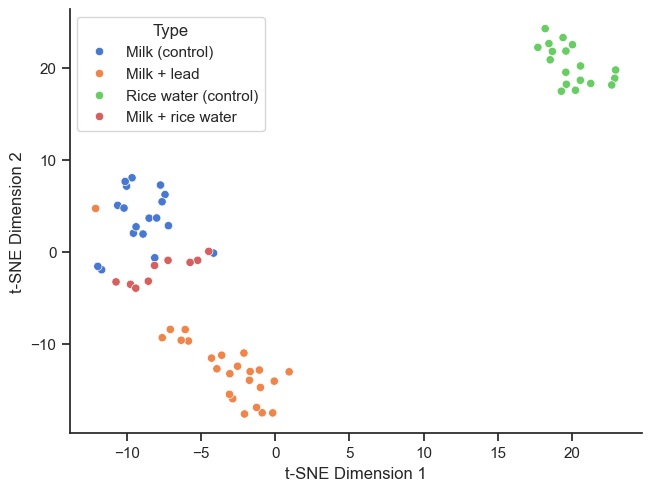

In [12]:
fig, ax = plt.subplots(constrained_layout=True)
sns.scatterplot(
    x=milk_tsne_scores[:, 0], y=milk_tsne_scores[:, 1], hue="Type", data=data2
)
ax.set(xlabel="t-SNE Dimension 1", ylabel="t-SNE Dimension 2")
sns.despine(fig=fig)

### 4.2(b)

**Tasks: Interpret the scores plot(s) to identify the variables that contribute most significantly to the observed clusters, specifically:**

1. **Which variables are most influential in discriminating between pure rice water and samples containing milk?**
2. **Which variables are most influential in discriminating between pure milk and lead-contaminated milk samples?**

**(Use loading plots to guide your interpretation.)**



**Hint:** Create a scatter plot of the loadings to show their importance for different principal
components and interpret ths together with the scores. Scatterplots can be created as follows (assuming that `pca` is a `PCA` object from scikit-learn, and that the variables used are stored in a list `variables`):
```python
from matplotlib import pyplot as plt

loadings = pca.components_.T  # Extract the loadings
variables = [
    "Red",
    "Green",
    "Blue",
    "Red/Blue",
    "Red/Green",
    "Blue/Green",
    "Grey",
]  # Store variable names
fig, ax = plt.subplots()  # Create empty plot
ax.scatter(loadings[:, 0], loadings[:, 1])  # Scatter plot of the loadings

for i, text in enumerate(variables):
    # Add the name of the variable as text next to the scatter points:
    ax.text(loadings[i, 0], loadings[i, 1], text, fontsize="small")  
``` 

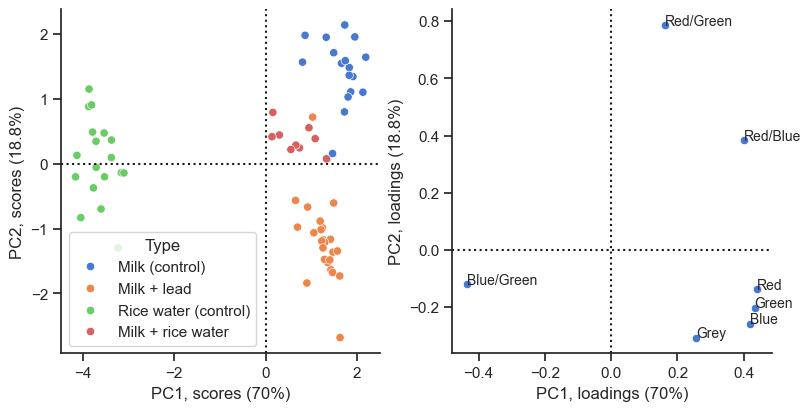

In [13]:
# We focus on PC1 and PC2 since the scores look most interesting here:

fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)


sns.scatterplot(x=scores[:, 0], y=scores[:, 1], data=data2, hue="Type", ax=ax1)
ax1.set_xlabel(f"PC1, scores ({pca.explained_variance_ratio_[0]*100:.3g}%)")
ax1.set_ylabel(f"PC2, scores ({pca.explained_variance_ratio_[1]*100:.3g}%)")

ax1.axhline(y=0, color="k", ls=":")
ax1.axvline(x=0, color="k", ls=":")

loadings = pca.components_.T
sns.scatterplot(x=loadings[:, 0], y=loadings[:, 1], ax=ax2)

for i, text in enumerate(variables):
    ax2.text(loadings[i, 0], loadings[i, 1], text, fontsize="small")


ax2.set_xlabel(f"PC1, loadings ({pca.explained_variance_ratio_[0]*100:.3g}%)")
ax2.set_ylabel(f"PC2, loadings ({pca.explained_variance_ratio_[1]*100:.3g}%)")
ax2.axhline(y=0, color="k", ls=":")
ax2.axvline(x=0, color="k", ls=":")


sns.despine(fig=fig)

#### Your answer to question 4.2(b): What variables are important for distinguishing between (1) pure rice water and samples containing milk, and (2) samples of pure milk and milk contaminated by lead?

1. The separation between pure rice water and milk-containing samples is primarily along PC1. The Blue/Green ratio has a negative loading on PC1. Since rice water samples are located on the negative side of PC1, they are expected to have higher Blue/Green ratio values compared to milk-containing samples. Conversely, milk-containing samples, positioned on the positive side of PC1, exhibit higher values for the other variables, all of which have positive loadings on PC1.

2. The separation between pure milk and lead-contaminated milk samples is primarily driven by PC2. The Red/Green and Red/Blue ratios exhibit positive loadings on PC2, with the Red/Green ratio showing the strongest influence. Consequently, pure milk samples, located on the positive side of PC2, display higher Red/Green ratio values compared to lead-contaminated samples. Conversely, the Grey intensity, which has a negative loading on PC2, is expected to be higher in lead-contaminated samples, positioned on the negative side of PC2.

We can test out these observations, by looking at the distributions for the identified variables. First let see if we can see the separation along PC1, by just looking at the biggest contributing variable (Blue/Green):

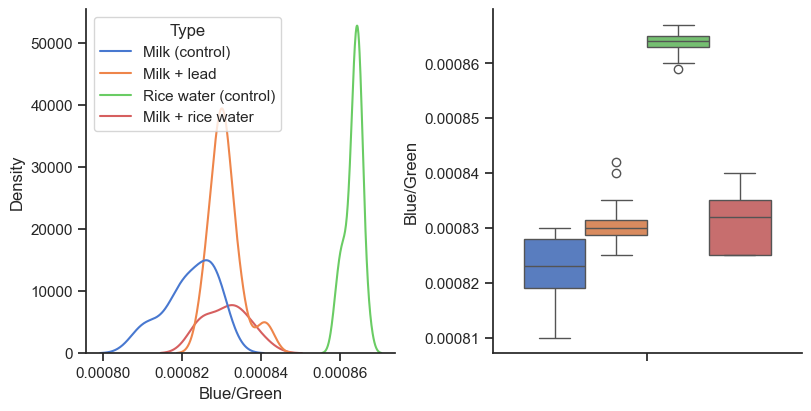

In [14]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
sns.kdeplot(data=data2, x="Blue/Green", hue="Type", ax=ax1)
sns.boxplot(data=data2, y="Blue/Green", hue="Type", ax=ax2)
ax2.get_legend().remove()
sns.despine(fig=fig)

And we see a clear distinction between rice water and the other samples. Next, let us check if we can se the distinction between pure milk and lead-contaminated samples along PC2:

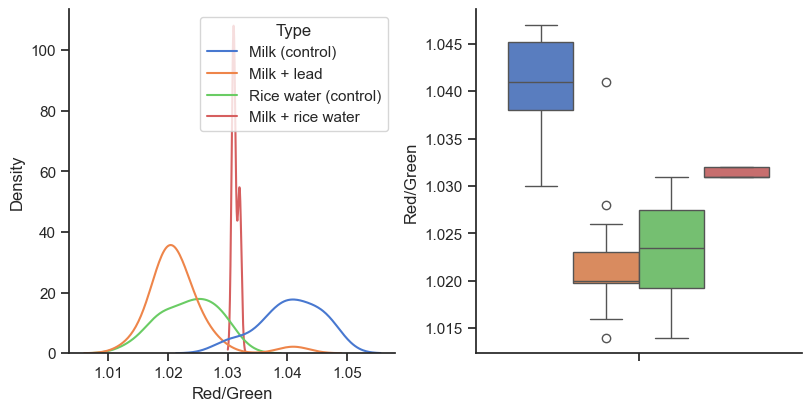

In [15]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
sns.kdeplot(data=data2, x="Red/Green", hue="Type", ax=ax1)
sns.boxplot(data=data2, y="Red/Green", hue="Type", ax=ax2)
ax2.get_legend().remove()
sns.despine(fig=fig)

A separation is observed between pure milk and lead-contaminated samples, though it is less distinct than the separation between rice water and milk, and one or two potential outliers warrant further investigation.

## Exercise 4.3 Clustering

In [Exercise 4.1](#Exercise-4.1-Molecular-conformations), we analysed molecular conformations using PCA. The file [scores.4.1.csv](./scores.4.1.csv) contains the scores for principal components 1 (column `PC1`) and 2 (column `PC2`). In this exercise, we will investigate if we can find clusters in this data by applying [k-means](https://en.wikipedia.org/wiki/K-means_clustering) clustering.

### 4.3(a)

**Tasks:**
1. **Load the data from [scores.4.1.csv](./scores.4.1.csv) and perform k-means clustering, considering the number of clusters (k) from 1 to 10**
2. **Plot the within-cluster sum of squared distances of the samples to their closest cluster centre as a function of the number of clusters (k).**
3. **Use the plot created above (the "elbow method") to identify the best number of clusters. Explain your reasoning for selecting the best number of clusters.**

**Hint:** scikit-learn can perform [k-means clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Here is one example to perform it for 3 clusters:
```python
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv("scores.4.1.csv")  # Load the data
# Set up the k-means method to look for 3 clusters:
cluster = KMeans(n_clusters=3)  # n_clusters selects the number of clusters
cluster.fit(data)  # Run clustering on our data
# Print out cluster centers:
print(cluster.cluster_centers_)
# Print out the within-cluster sum of squared distances of samples to their closest cluster centre:
print(cluster.inertia_)
```

**Note:** The elbow method is a heuristic, and does not always provide a clear answer.

In [16]:
import pandas as pd
from sklearn.cluster import KMeans

data3 = pd.read_csv("scores.4.1.csv")
data3.head()

,PC1,PC2
0,-2.022273,0.123496
1,-2.061231,0.440030
2,-2.134665,0.304641
3,-2.000763,0.324481
4,-2.107448,0.222284


In [17]:
clusters = []
for i in range(1, 11):
    cluster_i = KMeans(n_clusters=i)
    cluster_i.fit(data3)
    clusters.append(cluster_i)

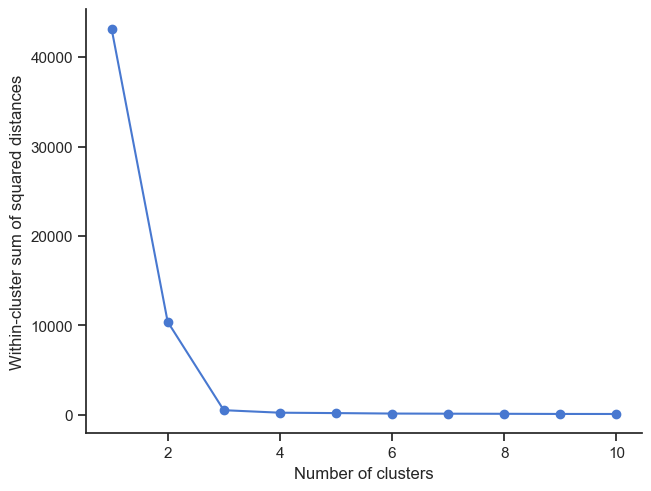

In [18]:
sse = np.array([i.inertia_ for i in clusters])
n_clusters = np.array([i.n_clusters for i in clusters], dtype=int)

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(n_clusters, sse, marker="o")
ax.set(
    xlabel="Number of clusters",
    ylabel="Within-cluster sum of squared distances",
)
sns.despine(fig=fig)

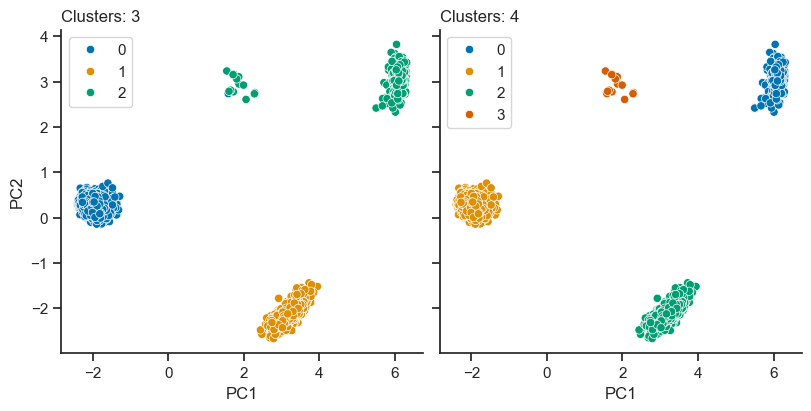

In [19]:
# Extra, let us visualise the clustering:
fig, axes = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4), sharex=True, sharey=True
)


sns.scatterplot(
    data=data3,
    x="PC1",
    y="PC2",
    hue=clusters[2].labels_,
    palette="colorblind",
    ax=axes[0],
)
axes[0].set_title(f"Clusters: {clusters[2].n_clusters}", loc="left")

sns.scatterplot(
    data=data3,
    x="PC1",
    y="PC2",
    hue=clusters[3].labels_,
    palette="colorblind",
    ax=axes[1],
)
axes[1].set_title(f"Clusters: {clusters[3].n_clusters}", loc="left")
sns.despine(fig=fig)

#### Your answer to question 4.3(a): What is the best number of clusters, and how did you select it?

There is a significant drop in the sum of squared distances going from 2 to 3 clusters. The drop when going from 3 to 4 is much smaller, and even smaller when going from 4 to 5. This "elbow" suggest that 3 clusters are enough to capture the primary structure of the data.

A visual inspection (see the figure above) indicates that 4 is a better number. The fourth cluster is much smaller than the other clusters and this could explain why the within-cluster sum of squared distances did not change noteably when it was added. Since there is some ambiguity here, we will evaluate silhouette scores and the Gap statistic below.

### 4.3(b)

The [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) measures how similar a data point is to its own cluster compared to other clusters, and can be used to select the best number of clusters by comparing silhouette values for different clusterings.


**Task: Calculate the mean silhouette score for 2 to 10 clusters. Plot the mean silhouette value as a function of the number of cluster centres. What is the best number of clusters to use, based on this plot? Explain your reasoning for selecting the best number of clusters.**

**Hint:** Given a clustering, you can find the silhouette value as follows:
```python
from sklearn.metrics import silhouette_score

cluster = KMeans(n_clusters=3)  # n_clusters selects the number of clusters
cluster.fit(data)  # Run clustering on our data
# Get what cluster the different points are assigned to:
cluster_labels = cluster.predict(data)
silhouette_mean = silhouette_score(data, cluster_labels)
print(silhouette_mean)
```

**Note:** The silhouette score is *not defined* for 1 cluster. (Can you explain why?)

**Note:** The silhouette score is also a heuristic, and does not always provide a clear answer.

In [20]:
from sklearn.metrics import silhouette_score

silhouette = []
n_clusters = []


for cluster_i in clusters:
    if cluster_i.n_clusters < 2:
        continue
    cluster_labels = cluster_i.predict(data3)
    silhouette_mean = silhouette_score(data3, cluster_labels)
    silhouette.append(silhouette_mean)
    n_clusters.append(cluster_i.n_clusters)

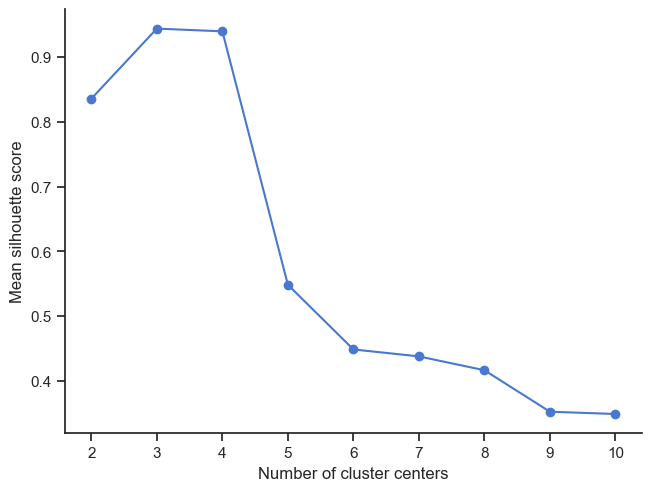

In [21]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(n_clusters, silhouette, marker="o")
ax.set(xlabel="Number of cluster centers", ylabel="Mean silhouette score")
sns.despine(fig=fig)

#### Your answer to question 4.3(b): What is the best number of clusters, and how did you select it?

Analysing the mean silhouette scores across different cluster numbers, we observe that the maximum value occurs around 3 or 4 clusters. This suggests that either 3 or 4 clusters could be optimal. In the previous question, we noted that the fourth cluster is significantly smaller than the others, meaning that its inclusion might not influence the mean silhouette score noticeably (its importance is masked by its size).

To gain further insights, we will next calculate the Gap statistic.

### 4.3(c)

The [Gap statistic](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_gap_statistics) compares the total within-cluster dispersion (often represented as the sum of pairwise distances within each cluster, W) with what we would expect for uniformly randomly distributed points (Ŵ). The optimal number of clusters is the point where the "Gap", which is the difference between log(W) and log(Ŵ), is largest.


**Task: Obtain and plot the Gap statistic value as a function of the number of cluster centres (consider 1 to 10 clusters). What is the best number of clusters to use, based on this plot? Explain your reasoning for selecting the best number of clusters.**

**Hint:** The Gap statistic can be obtained via the [gapstat](https://github.com/jmmaloney3/gapstat) package. If you do not have this one installed, you can install it via (in a terminal):

```bash
pip install git+https://github.com/jmmaloney3/gapstat
```

To install it directly from a Jupyter notebook, you need to add a "!" in front of the command:
```bash
!pip install git+https://github.com/jmmaloney3/gapstat
```

To calculate the Gap statistic:

```python
from gapstat import gapstat_score

cluster = KMeans(n_clusters=3)  # n_clusters selects the number of clusters
cluster.fit(data)  # Run clustering on our data
# Get what cluster the different points are assigned to:
cluster_labels = cluster.predict(data)

gap, _, _, _, error = gapstat_score(
    data, cluster_labels, k=3, calcStats=True
)

# gap = the Gap statistic
# error = standard deviation for the Gap statistic
```

**Note:** The Gap statistic is also a heuristic, and does not always provide a clear answer.

In [22]:
from gapstat import gapstat_score

n_clusters = []
gaps = []
gaps_error = []

for cluster_i in clusters:
    cluster_labels = cluster_i.predict(data3)
    gap, _, _, _, error = gapstat_score(
        data3, cluster_labels, k=cluster_i.n_clusters, calcStats=True
    )
    n_clusters.append(cluster_i.n_clusters)
    gaps.append(gap)
    gaps_error.append(error)

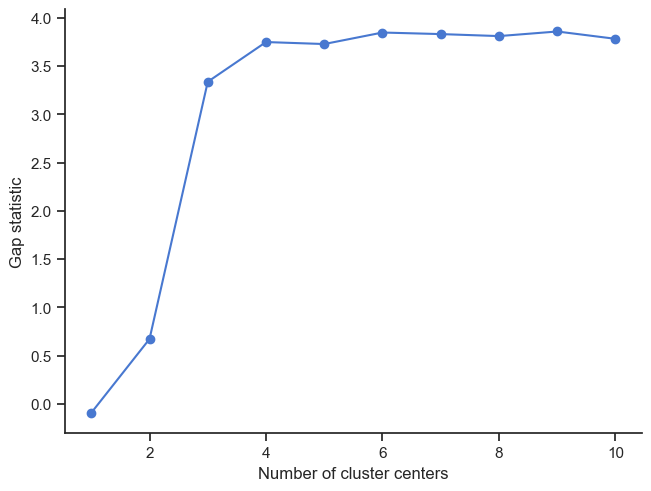

In [23]:
fig, ax = plt.subplots(constrained_layout=True)
ax.errorbar(n_clusters, gaps, yerr=gaps_error, marker="o")
ax.set(xlabel="Number of cluster centers", ylabel="Gap statistic")
sns.despine(fig=fig)

#### Your answer to question 4.3(c): What is the best number of clusters, and how did you select it?

In this case, we observe that the Gap statistic increases when we add the fourth cluster. There is a small increase when we add a fifth cluster, and a subsequent drop when adding a sixth. This pattern suggests that 4 or 5 clusters might be optimal.

Combining this analysis with the elbow plot and the silhouette scores further strengthens the case for four clusters. Both the elbow plot and the silhouette analysis indicated 3 or 4 as potential optimal cluster numbers, while the Gap statistic suggests 4 or 5. By considering the intersection of these findings and giving each metric equal weight, we arrive at 4 clusters as the most consistent choice.

### 4.3(d)

**Task: Repeat [4.3(a)](#4.3(a))-[4.3(c)](#4.3(c)), but use the original data in [molecule.csv](./molecule.csv) instead of the PCA scores. What is the best number of clusters? Explain your reasoning for selecting the best number of clusters.**

In [24]:
data4 = pd.read_csv("molecule.csv")

sse2 = []
silhouette2 = []
gaps2 = []
clusters2 = []

for i in range(1, 11):
    cluster_i = KMeans(n_clusters=i)
    cluster_i.fit(data4)
    cluster_labels = cluster_i.predict(data4)

    clusters2.append(cluster_i)

    sse2.append([i, cluster_i.inertia_])
    if i > 1:
        silhouette_mean = silhouette_score(data4, cluster_labels)
        silhouette2.append([i, silhouette_mean])

    gap, _, _, _, error = gapstat_score(
        data4, cluster_labels, k=cluster_i.n_clusters, calcStats=True
    )
    gaps2.append([i, gap, error])

In [25]:
sse2 = np.array(sse2)
silhouette2 = np.array(silhouette2)
gaps2 = np.array(gaps2)

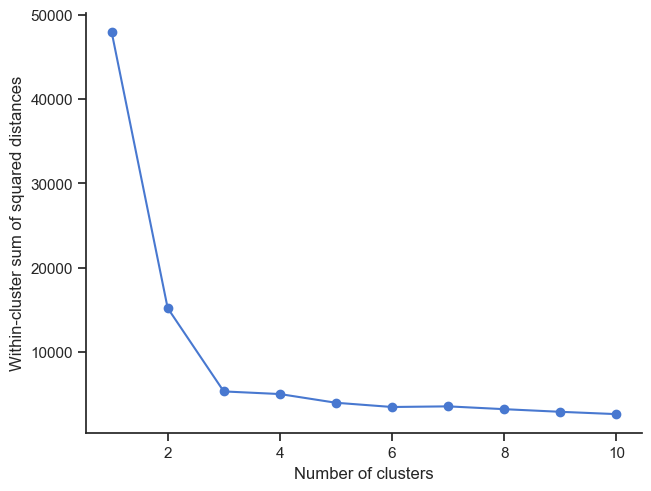

In [26]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(sse2[:, 0], sse2[:, 1], marker="o")
ax.set(
    xlabel="Number of clusters",
    ylabel="Within-cluster sum of squared distances",
)
sns.despine(fig=fig)

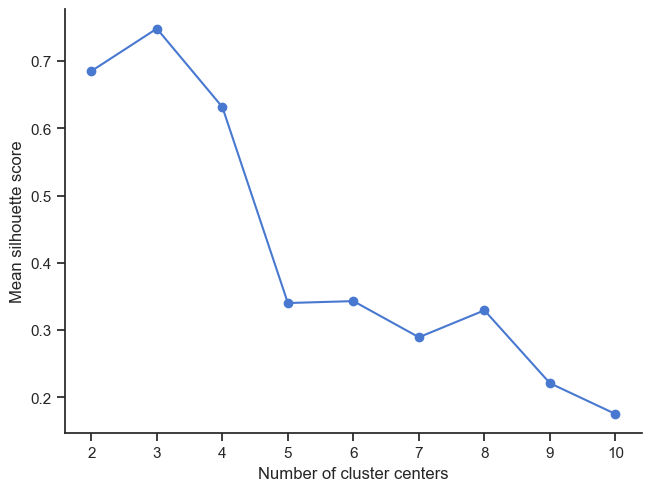

In [27]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(silhouette2[:, 0], silhouette2[:, 1], marker="o")
ax.set(xlabel="Number of cluster centers", ylabel="Mean silhouette score")
sns.despine(fig=fig)

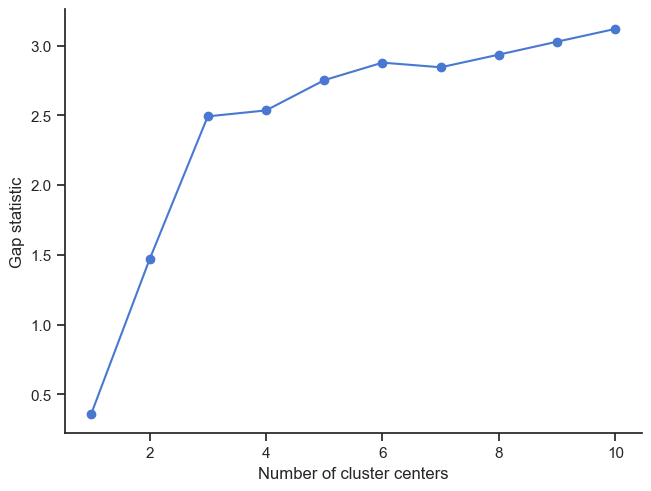

In [28]:
fig, ax = plt.subplots(constrained_layout=True)
ax.errorbar(gaps2[:, 0], gaps2[:, 1], yerr=gaps2[:, 2], marker="o")
ax.set(xlabel="Number of cluster centers", ylabel="Gap statistic")
sns.despine(fig=fig)

#### Your answer to question 4.3(d): What is the best number of clusters, and how did you select it?

In this case, the Gap statistic does not give a clear answer since it keeps increasing when adding more cluster centres. Both the elbow method and the silhouette value indicate that 3 clusters is the optimal number: there is a clear drop in the within-cluster sum of squared distances up to 3 clusters, and there is a peak in the silhouette value at 3 clusters.

Visual inspection of the clusters is not feasible due to the high dimensionality of the data (66 variables). Since both the elbow method and the silhouette value agree on 3 clusters, we conclude that the best number of clusters is 3. It is worth noting that using principal component scores for visualisation can simplify the analysis in high-dimensional cases like this, making it easier to visualise and understand the cluster structure.

### 4.3(e)

**Task: Repeat the clustering of the data in [scores.4.1.csv](./scores.4.1.csv), but use the density-based method [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). How many clusters were identified by DBSCAN?**

**Hint:** Assuming that the matrix `X` contains our raw data, DBSCAN clustering can be performed with:
```python
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=5)
labels = clustering.fit(X)
```

**Note:** The results from DBSCAN may depend on the hyperparameters `eps` and `min_samples`. Explore different values for these parameters and investigate how they affect the number of clusters and noise points identified. Consider visualising the clusters or calculating silhouette scores.



**Hint:** Assuming that the matrix `X` contains our raw data, DBSCAN clustering can be performed with:
```python
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=5)
labels = clustering.fit(X)
```

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples

# We try some different values for eps and min_samples:
eps = [0.1, 1.0, 3.0]
min_samples = [5, 15, 30]

results = {
    "eps": [],
    "min_samples": [],
    "silhouette": [],
    "silhouette-noise": [],
    "clusters": [],
    "noise": [],
}

for eps_i in eps:
    for min_samples_i in min_samples:
        cluster_i = DBSCAN(eps=eps_i, min_samples=min_samples_i)
        labels = cluster_i.fit_predict(data3)

        count = {}

        for i in labels:
            idx = int(i)
            if idx not in count:
                count[idx] = 0
            count[idx] += 1

        noise = count.get(-1, 0)

        n_clusters = sum(1 if key != -1 else 0 for key in count)

        if n_clusters > 1:
            # Skip noise points for silhouette:
            mask = labels != -1
            mask_noise = labels == -1

            silh = silhouette_samples(data3, labels)
            silhouette_mean = np.mean(silh[mask])

            if sum(mask_noise) < 1:
                silhouette_noise_mean = float("nan")
            else:
                silhouette_noise_mean = np.mean(silh[mask_noise])
        else:
            silhouette_mean = float("nan")
            silhouette_noise_mean = float("nan")

        results["eps"].append(eps_i)
        results["min_samples"].append(min_samples_i)
        results["noise"].append(noise)
        results["clusters"].append(n_clusters)
        results["silhouette"].append(silhouette_mean)
        results["silhouette-noise"].append(silhouette_noise_mean)

table = pd.DataFrame(results)
table.sort_values(by="silhouette")

,eps,min_samples,silhouette,silhouette-noise,clusters,noise
0,0.1,5,0.935335,-0.851315,4,33
3,1.0,5,0.939264,NaN,4,0
4,1.0,15,0.939264,NaN,4,0
6,3.0,5,0.939264,NaN,4,0
7,3.0,15,0.939264,NaN,4,0
5,1.0,30,0.939373,0.912145,3,16
8,3.0,30,0.939373,0.912145,3,16
1,0.1,15,0.941839,-0.681965,3,92
2,0.1,30,0.945558,-0.780344,3,168


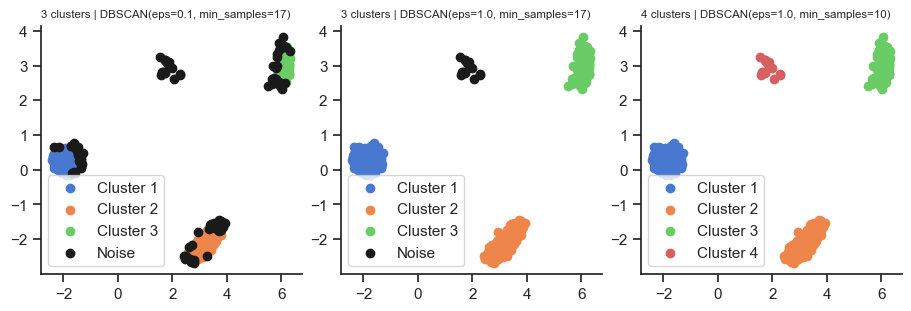

In [30]:
fig, axes = plt.subplots(constrained_layout=True, ncols=3, figsize=(9, 3))
cluster_4 = DBSCAN(eps=1.0, min_samples=10)
labels4 = cluster_4.fit_predict(data3)
cluster_3 = DBSCAN(eps=1.0, min_samples=17)
labels3 = cluster_3.fit_predict(data3)

cluster_0 = DBSCAN(eps=0.1, min_samples=17)
labels0 = cluster_0.fit_predict(data3)


def show_clusters(ax, clustering, labels):
    n = 0
    for clu in set(labels):
        xval = data3["PC1"][labels == clu]
        yval = data3["PC2"][labels == clu]
        if clu == -1:
            ax.scatter(
                xval,
                yval,
                label=f"Noise",
                color="k",
            )
        else:
            n += 1
            ax.scatter(
                xval,
                yval,
                label=f"Cluster {clu+1}",
            )
    ax.legend()

    cluster_3.eps
    ax.set_title(
        f"{n} clusters | {clustering}", loc="left", fontsize="x-small"
    )


show_clusters(axes[0], cluster_0, labels0)
show_clusters(axes[1], cluster_3, labels3)
show_clusters(axes[2], cluster_4, labels4)


sns.despine(fig=fig)

#### Your answer to question 4.3(e): How many clusters did you find with DBSCAN? How is this influenced by the hyperparameters?

DBSCAN identified a varying number of clusters depending on the hyperparameters `eps` and `min_samples`:

* Low `eps` values resulted in more noise points (samples are too far away to be considered neighbours) while higher `eps` values resulted in fewer noise points (when keeping `min_samples` fixed).
* High `min_samples` (i.e., higher than 16 in this case) misses the smallest cluster since it only contains 16 samples.

Interpretation of the silhouette values is more complex since we may have noise points, and the mean silhouette value was only calculated considering the non-noise points. While a high silhouette score might suggest a good clustering, it can be misleading if a significant portion of the data is labelled as noise. In some cases where 3 clusters were identified, the mean silhouette score for the 16 noise points was high (0.91). This occurred when `min_samples` was greater than 16. This suggests that these 16 samples may be considered as an independent cluster.

Overall, the DBSCAN result points towards 4 clusters in this data set.